In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
class FastParkingDataLoader:
    """Ultra-fast data loader with minimal preprocessing"""
    def __init__(self, file_path='parkingStream.csv'):
        self.file_path = file_path

    def load_and_preprocess(self):
        """Load data with minimal preprocessing for speed"""
        print(f"Loading data from {self.file_path}...")

        # Use optimized pandas read with specific dtypes
        dtype_dict = {
            'ID': 'int16',
            'Capacity': 'int16',
            'Occupancy': 'int16',
            'VehicleType': 'category',
            'QueueLength': 'int8',
            'IsSpecialDay': 'bool'
        }

        df = pd.read_csv(self.file_path, dtype=dtype_dict)

        # Batch rename and process
        df.rename(columns={
            'ID': 'location_id', 'Capacity': 'capacity', 'Occupancy': 'occupancy',
            'VehicleType': 'vehicle_type', 'TrafficConditionNearby': 'traffic_level',
            'QueueLength': 'queue_length', 'IsSpecialDay': 'is_special_day',
            'Timestamp': 'timestamp'
        }, inplace=True)

        # Fast datetime conversion
        df['timestamp'] = pd.to_datetime(df['timestamp'])

        # Vectorized operations
        df['hour'] = df['timestamp'].dt.hour
        df['is_weekend'] = df['timestamp'].dt.weekday >= 5

        # Quick data cleaning
        df['traffic_level'] = pd.to_numeric(df['traffic_level'], errors='coerce').fillna(50)
        df = df[(df['occupancy'] >= 0) & (df['capacity'] > 0) & (df['occupancy'] <= df['capacity'])]

        # Sample data for faster processing if dataset is large
        if len(df) > 10000:
            df = df.sample(n=10000, random_state=42).sort_values('timestamp')

        print(f"Loaded {len(df)} records for {df['location_id'].nunique()} locations")
        return df

In [3]:
# Price model
class UltraFastPricingModel:
    """Optimized pricing model with minimal calculations"""
    def __init__(self, base_price=10):
        self.base_price = base_price
        self.vehicle_weights = {'car': 1.0, 'bike': 0.5, 'truck': 1.5}

    def calculate_prices_vectorized(self, df):
        """Ultra-fast vectorized price calculation"""
        # Single vectorized calculation
        occupancy_rate = df['occupancy'] / df['capacity']
        queue_norm = np.clip(df['queue_length'] / 10.0, 0, 1)
        traffic_norm = df['traffic_level'] / 100.0

        # Simplified demand calculation
        demand = (0.6 * occupancy_rate +
                 0.3 * queue_norm -
                 0.1 * traffic_norm +
                 0.2 * df['is_special_day'].astype(float))

        # Direct price calculation without smoothing for speed
        price_multiplier = np.clip(1 + 0.5 * np.tanh(demand), 0.5, 2.0)
        price = self.base_price * price_multiplier

        result_df = df.copy()
        result_df['demand'] = demand
        result_df['price'] = price.round(2)
        result_df['occupancy_rate'] = occupancy_rate

        return result_df

In [4]:
class MinimalProcessor:
    """Streamlined processor for maximum speed"""
    def __init__(self, data):
        self.data = data
        self.pricing_model = UltraFastPricingModel()
        self.processed_data = None

    def process_data_stream(self):
        """Process data in one vectorized operation"""
        print("Processing data...")
        start_time = time.time()

        self.processed_data = self.pricing_model.calculate_prices_vectorized(self.data)

        end_time = time.time()
        print(f"✅ Processing complete! {end_time - start_time:.2f} seconds for {len(self.data)} records")
        return self.processed_data

In [5]:
#  visulizer
class BasicVisualizer:
    """Simple matplotlib visualizations for speed"""
    def __init__(self, processor):
        self.processed_data = processor.processed_data

    def create_summary_plots(self):
        """Create essential plots only"""
        print("Creating visualizations...")

        fig, axes = plt.subplots(2, 2, figsize=(12, 8))

        # Average price over time
        time_prices = self.processed_data.groupby('timestamp')['price'].mean()
        axes[0, 0].plot(time_prices.index, time_prices.values, 'b-', linewidth=2)
        axes[0, 0].axhline(y=10, color='r', linestyle='--', alpha=0.7, label='Base Price')
        axes[0, 0].set_title('Average Price Over Time')
        axes[0, 0].set_ylabel('Price ($)')
        axes[0, 0].legend()
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Price distribution
        axes[0, 1].hist(self.processed_data['price'], bins=20, alpha=0.7, color='green')
        axes[0, 1].set_title('Price Distribution')
        axes[0, 1].set_xlabel('Price ($)')
        axes[0, 1].set_ylabel('Frequency')

        # Demand vs Occupancy
        sample_data = self.processed_data.sample(n=min(1000, len(self.processed_data)))
        axes[1, 0].scatter(sample_data['occupancy_rate'], sample_data['demand'],
                          alpha=0.6, s=10, color='purple')
        axes[1, 0].set_title('Demand vs Occupancy Rate')
        axes[1, 0].set_xlabel('Occupancy Rate')
        axes[1, 0].set_ylabel('Demand Score')

        # Price by location (top 10 locations)
        top_locations = self.processed_data['location_id'].value_counts().head(10).index
        location_prices = self.processed_data[self.processed_data['location_id'].isin(top_locations)]
        location_avg = location_prices.groupby('location_id')['price'].mean()
        axes[1, 1].bar(range(len(location_avg)), location_avg.values, color='orange')
        axes[1, 1].set_title('Average Price by Location (Top 10)')
        axes[1, 1].set_xlabel('Location ID')
        axes[1, 1].set_ylabel('Average Price ($)')
        axes[1, 1].set_xticks(range(len(location_avg)))
        axes[1, 1].set_xticklabels(location_avg.index, rotation=45)

        plt.tight_layout()
        plt.show()

In [6]:
# Analyzer
class QuickAnalyzer:
    """Fast analysis with key metrics only"""
    def __init__(self, processor):
        self.processed_data = processor.processed_data
        self.pricing_model = processor.pricing_model

    def quick_analysis(self):
        """Generate key insights quickly"""
        print("\n" + "="*50)
        print("QUICK ANALYSIS RESULTS")
        print("="*50)

        df = self.processed_data

        # Key statistics
        print(f"📊 Dataset Summary:")
        print(f"   Records Processed: {len(df):,}")
        print(f"   Unique Locations: {df['location_id'].nunique()}")
        print(f"   Time Range: {df['timestamp'].min()} to {df['timestamp'].max()}")

        print(f"\n💰 Pricing Summary:")
        print(f"   Base Price: ${self.pricing_model.base_price:.2f}")
        print(f"   Average Price: ${df['price'].mean():.2f}")
        print(f"   Price Range: ${df['price'].min():.2f} - ${df['price'].max():.2f}")
        print(f"   Price Std Dev: ${df['price'].std():.2f}")

        # Top insights
        current_state = df.groupby('location_id').last()
        most_expensive = current_state['price'].idxmax()
        least_expensive = current_state['price'].idxmin()

        print(f"\n🎯 Key Insights:")
        print(f"   Most Expensive Location: {most_expensive} (${current_state.loc[most_expensive, 'price']:.2f})")
        print(f"   Least Expensive Location: {least_expensive} (${current_state.loc[least_expensive, 'price']:.2f})")

        # Revenue potential
        total_revenue = df['price'].sum()
        base_revenue = self.pricing_model.base_price * len(df)
        improvement = ((total_revenue - base_revenue) / base_revenue) * 100

        print(f"\n📈 Revenue Impact:")
        print(f"   Base Revenue: ${base_revenue:,.2f}")
        print(f"   Dynamic Revenue: ${total_revenue:,.2f}")
        print(f"   Improvement: {improvement:+.1f}%")

🚀 STARTING ULTRA-FAST PARKING PRICING SYSTEM

📊 Loading data...
Loading data from parkingStream.csv...
Loaded 10000 records for 10000 locations

⚙️ Processing pricing model...
Processing data...
✅ Processing complete! 0.01 seconds for 10000 records

📈 Creating visualizations...
Creating visualizations...


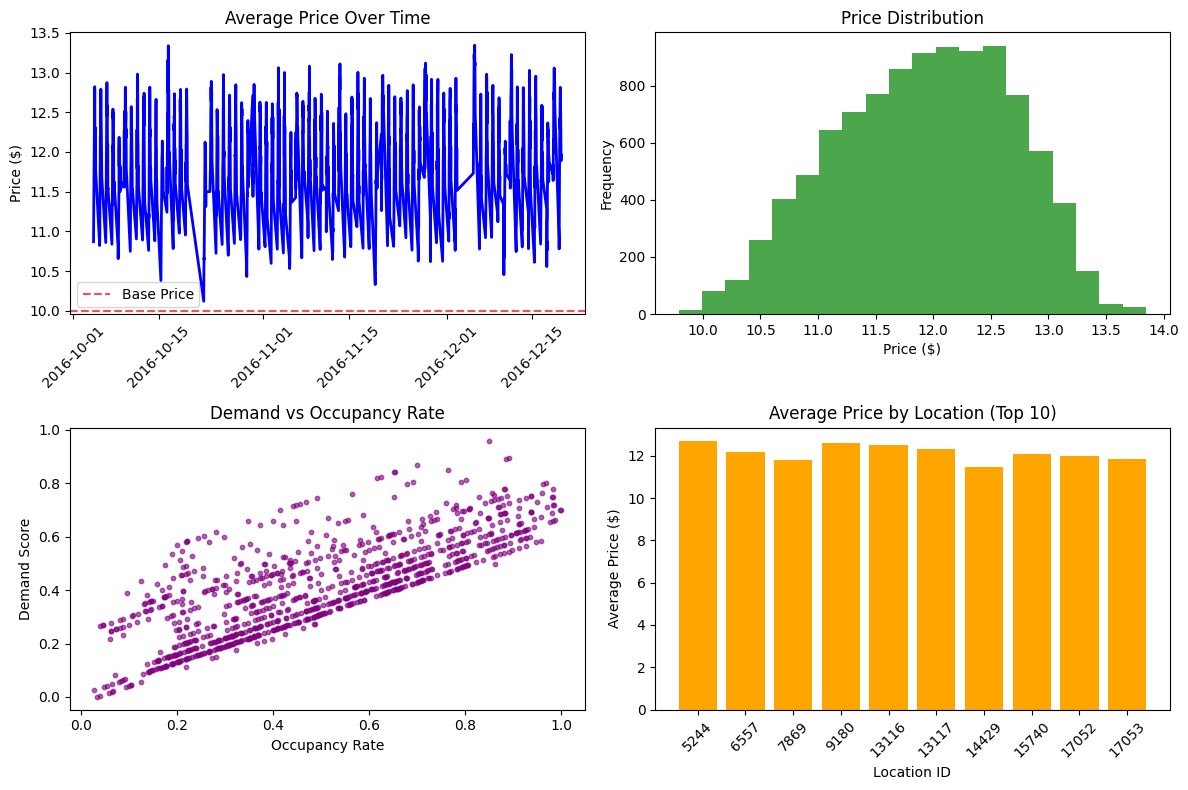


📊 Generating analysis...

QUICK ANALYSIS RESULTS
📊 Dataset Summary:
   Records Processed: 10,000
   Unique Locations: 10000
   Time Range: 2016-10-04 07:59:00 to 2016-12-19 16:30:00

💰 Pricing Summary:
   Base Price: $10.00
   Average Price: $11.92
   Price Range: $9.79 - $13.85
   Price Std Dev: $0.76

🎯 Key Insights:
   Most Expensive Location: 2129 ($13.85)
   Least Expensive Location: 1134 ($9.79)

📈 Revenue Impact:
   Base Revenue: $100,000.00
   Dynamic Revenue: $119,175.35
   Improvement: +19.2%

🎉 COMPLETE! Total execution time: 1.46 seconds

💾 Saving results...
✅ Results saved to 'fast_parking_results.csv'


In [7]:
#main work
def main():
    """Ultra-fast main execution"""
    print("🚀 STARTING ULTRA-FAST PARKING PRICING SYSTEM")
    total_start = time.time()

    # Step 1: Load data (optimized)
    print("\n📊 Loading data...")
    loader = FastParkingDataLoader('parkingStream.csv')
    parking_data = loader.load_and_preprocess()

    # Step 2: Process with minimal model
    print("\n⚙️ Processing pricing model...")
    processor = MinimalProcessor(parking_data)
    processed_data = processor.process_data_stream()

    # Step 3: Quick visualization
    print("\n📈 Creating visualizations...")
    visualizer = BasicVisualizer(processor)
    visualizer.create_summary_plots()

    # Step 4: Quick analysis
    print("\n📊 Generating analysis...")
    analyzer = QuickAnalyzer(processor)
    analyzer.quick_analysis()

    total_end = time.time()
    print(f"\n🎉 COMPLETE! Total execution time: {total_end - total_start:.2f} seconds")

    return processor, analyzer

# Run the optimized version
if __name__ == "__main__":
    processor, analyzer = main()

    # Optional: Save results
    print("\n💾 Saving results...")
    if processor.processed_data is not None:
        output_cols = ['timestamp', 'location_id', 'price', 'demand', 'occupancy_rate']
        processor.processed_data[output_cols].to_csv('fast_parking_results.csv', index=False)
        print("✅ Results saved to 'fast_parking_results.csv'")